In [2]:
import cv2
import os

In [3]:
image = cv2.imread('test2.jpg', cv2.IMREAD_COLOR)
print(image.shape)

(500, 500, 3)


In [4]:
height, width, channel = image.shape

In [5]:
cv2.imshow('IU', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
filped_image = cv2.flip(image, 1)
cv2.imshow('IU', filped_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 30, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderMode=cv2.BORDER_REPLICATE)


In [8]:
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderMode=cv2.BORDER_REFLECT)

In [10]:
cv2.imshow('Original_IU', image)
cv2.imshow('IU', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

# 이미지를 회전시키면서 여러 장 만들기

In [11]:
current_directory = os.getcwd() # 현재 디렉토리를 알아냄.

In [12]:
# 현재 디렉토리에 image라는 이름의 폴더가 있는지 검사 후 없으면 만든다.
if not os.path.exists(os.path.join(current_directory, "images")):
    os.mkdir("images")

In [13]:
image = cv2.imread('test2.jpg', cv2.IMREAD_COLOR)
height, width, channel = image.shape

In [14]:
# 이미지를 10도씩 회전시키면서 새로운 이미지를 만들어 저장
# make new image with 10 degree rotation

for angle in range(0, 360, 10):
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderMode=cv2.BORDER_REPLICATE)
    cv2.imwrite('./images/rotated_image_%d.jpg' %angle, rotated_image)

In [15]:
# 이미지를 두 배 확대, 두 배 축소
upsample_image = cv2.pyrUp(image, dstsize=(width*2, height*2), borderType=cv2.BORDER_DEFAULT)
downsample_image = cv2.pyrDown(image, dstsize=(width//2, height//2), borderType=cv2.BORDER_DEFAULT)

In [16]:
cv2.imshow('up_IU', upsample_image)
cv2.imshow('Original_IU', image)
# cv2.imshow('IU', rotated_image)
cv2.imshow('down_IU', downsample_image)

cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
absolute_image = cv2.resize(image, dsize=(500, 500), interpolation=cv2.INTER_LINEAR)
relative_image = cv2.resize(image, dsize=(0, 0), fx=0.3, fy=0.7, interpolation=cv2.INTER_AREA)

In [18]:
cv2.imshow('abs_IU', absolute_image)
cv2.imshow('rela_IU', relative_image)

cv2.waitKey()
cv2.destroyAllWindows()

# 오후

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

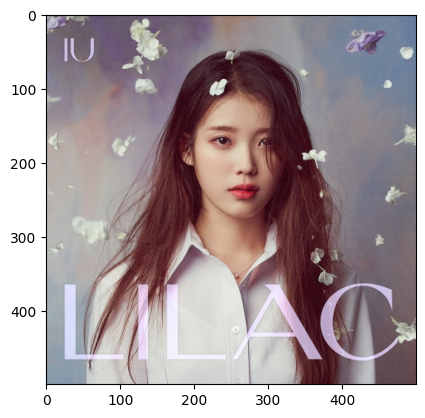

In [20]:
img = cv2.imread("test2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #채널 순서를 BGR에서 RGB로
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img)  # cmap='gray'
plt.show()

# Crop

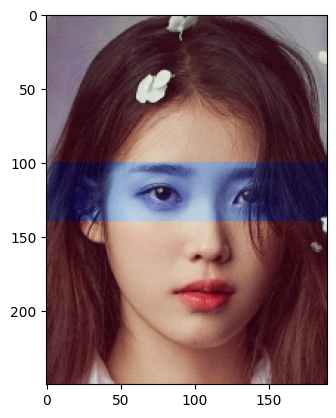

In [158]:
crop_img = img[50:300, 160:350].copy()
crop_img[100:140] = cv2.cvtColor(crop_img[100:140], cv2.COLOR_BGR2RGB)
plt.imshow(crop_img)
plt.show()

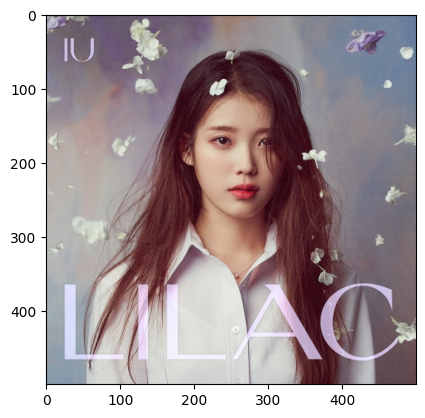

In [159]:
plt.imshow(img)
plt.show()

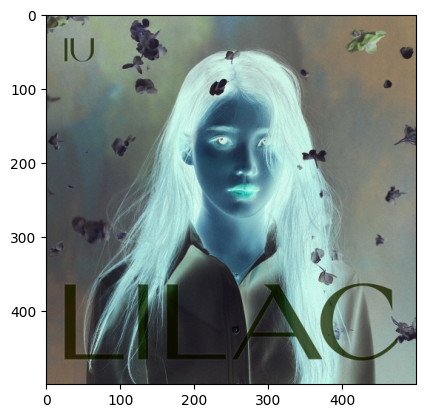

In [56]:
bn_img = cv2.bitwise_not(img)
plt.imshow(bn_img)
plt.show()

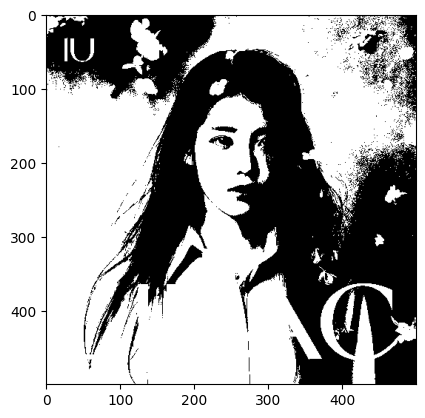

In [77]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, bin_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY, gray_img)
plt.imshow(bin_img, cmap='gray')
plt.show()

In [78]:
print(bin_img)
print(_)

[[255 255   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
127.0


# 블러 처리

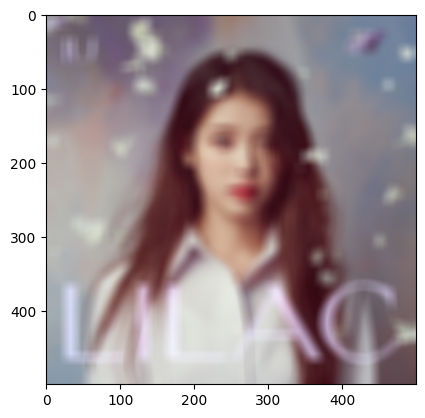

In [103]:
blur_img = cv2.blur(img, (16, 16))  # 표준해상도의 경우 2의 승 수로 해야 표준해상도에 딱 맞아 떨어짐.
plt.imshow(blur_img)
plt.show()

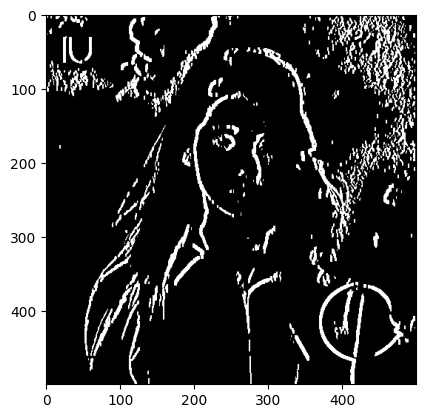

In [116]:
sobel_img = cv2.Sobel(gray_img,cv2.CV_8U, 1,0,ksize=5)  # 커널size는 홀수 최대 31까지
plt.imshow(sobel_img,cmap='gray')
plt.show()

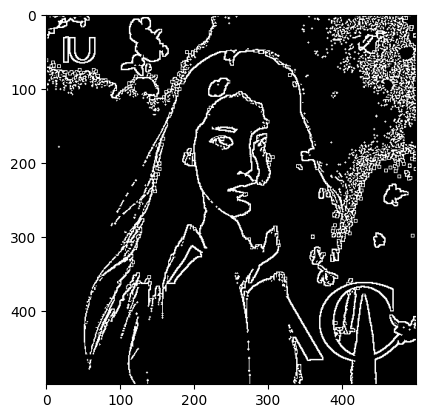

In [117]:
laplace_img = cv2.Laplacian(gray_img,cv2.CV_8U, ksize=5)  # 커널size는 홀수 최대 31까지
plt.imshow(laplace_img,cmap='gray')
plt.show()

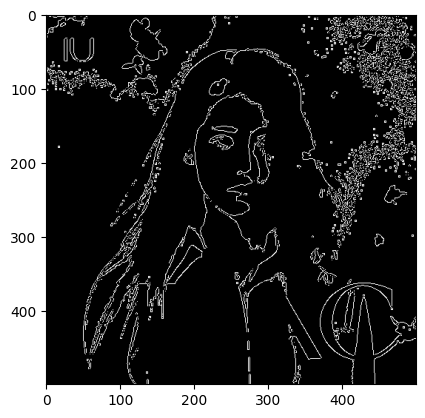

In [122]:
canny_img = cv2.Canny(gray_img, 122, 255)  # 커널size는 홀수 최대 31까지
plt.imshow(canny_img,cmap='gray')
plt.show()

# 색상 검출 hsv  
**hue 색상 / saturation 채도 / value 밝기**

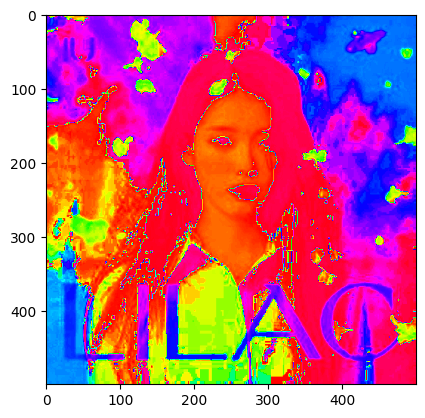

In [127]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img[:,:,0], cmap='hsv')
plt.show() # 명도 채도 빼고, 색상만 나옴

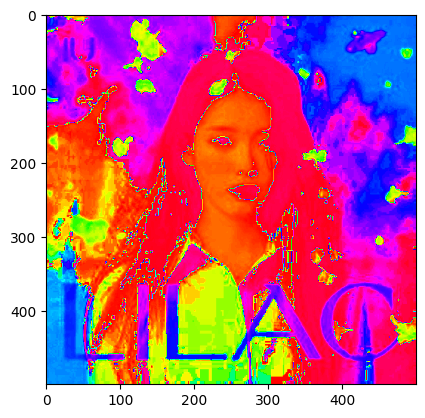

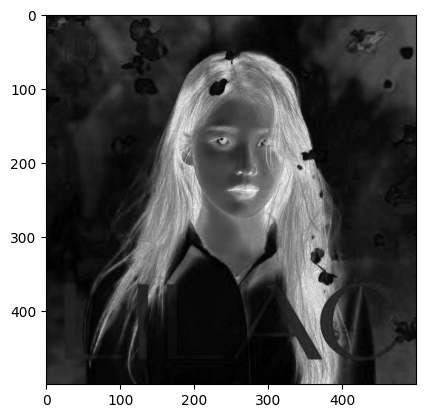

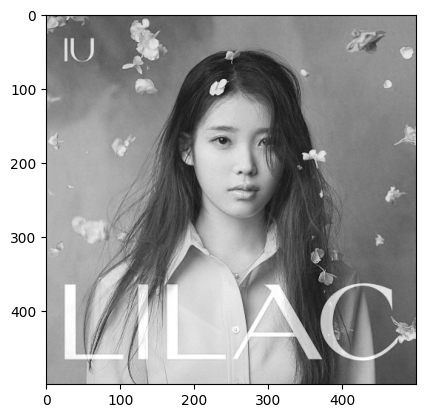

In [161]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv) # 채널을 기준으로 쪼개짐
plt.imshow(h, cmap='hsv')
plt.show() 
plt.imshow(s, cmap='gray')
plt.show() 
plt.imshow(v, cmap='gray')
plt.show() 

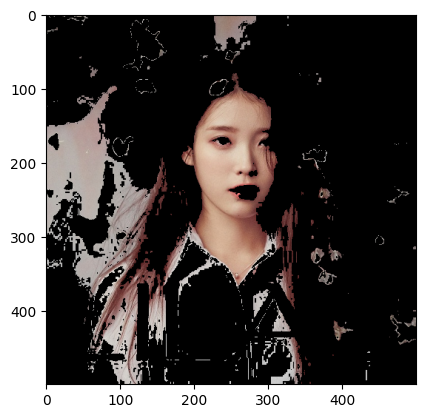

In [41]:
h_range = cv2.inRange(h, 0, 20)
red = cv2.bitwise_and(hsv, hsv, mask=h_range)
red = cv2.cvtColor(red, cv2.COLOR_HSV2RGB)
plt.imshow(red)
plt.show()

In [157]:
h.max()

179

In [31]:
help(cv2.convertScaleAbs)# 이미지 읽기
image = cv2.imread("test2.jpg")

# 이미지 형식 확인
if image.shape[2] == 3:
  # 이미지가 24비트이면 32비트로 변환
  image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

# 이미지 저장
cv2.imwrite("image_32bit.png", image)

Help on built-in function convertScaleAbs:

convertScaleAbs(...)
    convertScaleAbs(src[, dst[, alpha[, beta]]]) -> dst
    .   @brief Scales, calculates absolute values, and converts the result to 8-bit.
    .   
    .   On each element of the input array, the function convertScaleAbs
    .   performs three operations sequentially: scaling, taking an absolute
    .   value, conversion to an unsigned 8-bit type:
    .   \f[\texttt{dst} (I)= \texttt{saturate\_cast<uchar>} (| \texttt{src} (I)* \texttt{alpha} +  \texttt{beta} |)\f]
    .   In case of multi-channel arrays, the function processes each channel
    .   independently. When the output is not 8-bit, the operation can be
    .   emulated by calling the Mat::convertTo method (or by using matrix
    .   expressions) and then by calculating an absolute value of the result.
    .   For example:
    .   @code{.cpp}
    .       Mat_<float> A(30,30);
    .       randu(A, Scalar(-100), Scalar(100));
    .       Mat_<float> B = A*5 + 3;


True

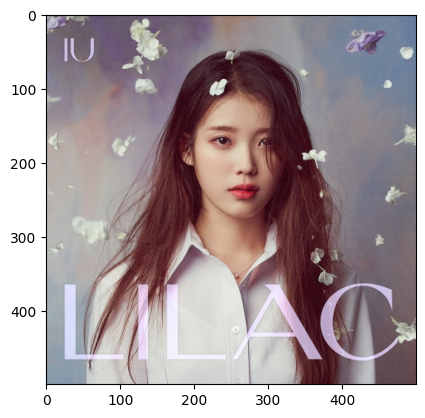

In [35]:
img = cv2.imread("32test.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)  
plt.show()


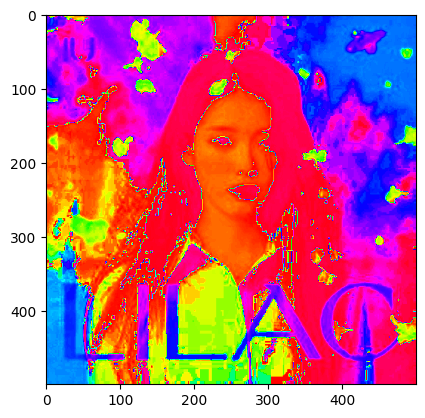

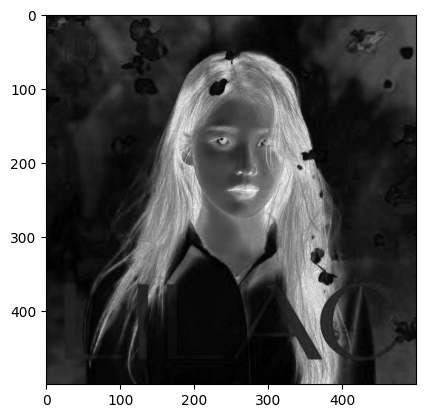

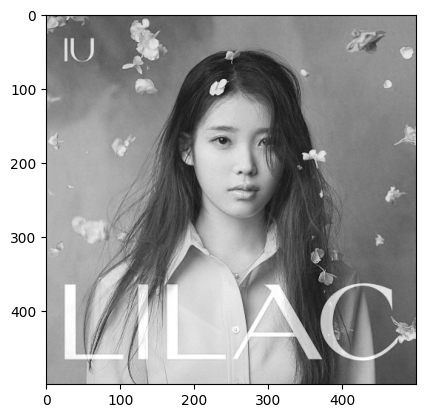

In [36]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv) # 채널을 기준으로 쪼개짐
plt.imshow(h, cmap='hsv')
plt.show() 
plt.imshow(s, cmap='gray')
plt.show() 
plt.imshow(v, cmap='gray')
plt.show() 

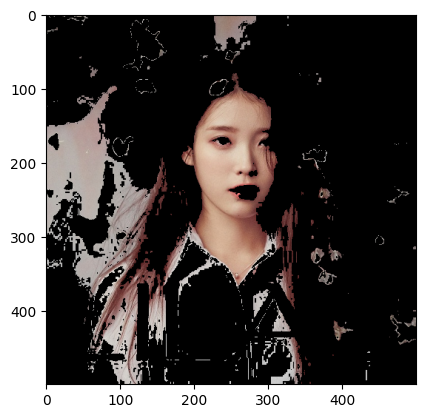

In [42]:
h_range = cv2.inRange(h, 0, 20)
red = cv2.bitwise_and(hsv, hsv, mask=h_range)
red = cv2.cvtColor(red, cv2.COLOR_HSV2RGB)
plt.imshow(red)
plt.show()

In [39]:
image.shape

(500, 500, 4)